# Graben

In [ ]:
import gempy as gp
import numpy as np
from sandbox import _test_data

In [ ]:
# For offline calculation
# data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
data_path = _test_data.get('gempy_example_data')
geo_data = gp.create_data("Graben", extent=[0, 2000, 0, 2000, 0, 1600], resolution=[50, 50, 50],
                              path_o=data_path + "foliations7.csv",
                              path_i=data_path + "interfaces7.csv")


In [3]:
gp.map_stack_to_surfaces(geo_data, {"Fault_1": 'Fault_1', "Fault_2": 'Fault_2',
                                    "Strat_Series": ('Sandstone', 'Siltstone', 
                                                     'Shale', 'Sandstone_2', 
                                                     'Schist', 'Gneiss')},
                                  )
geo_data.set_is_fault(['Fault_1', 'Fault_2'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_1,1,Fault,True,True,False
Fault_2,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [4]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_run')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                         values
range              3249.615362
$C_o$            251428.571429
drift equations   [3, 3, 3, 3]


In [5]:
sol = gp.compute_model(geo_data)

/home/danielsk78/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


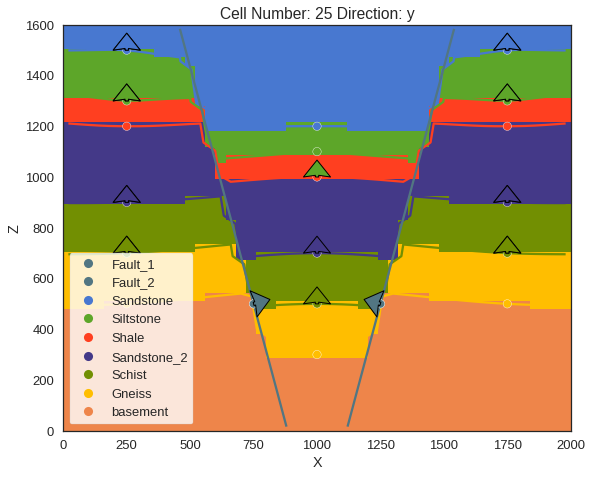

In [6]:
gp.plot_2d(geo_data, cell_number=25,direction='y', show_data=True)

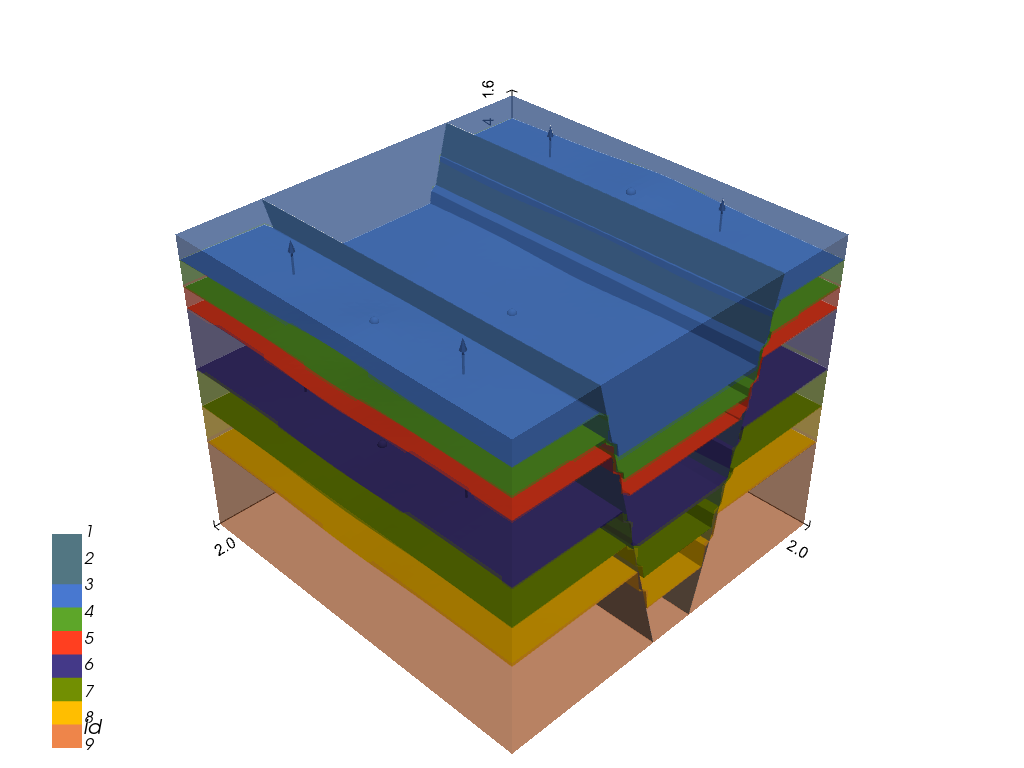

In [7]:
#3d view
gp.plot_3d(geo_data, image=False, show_topography=True, plotter_type='basic', notebook=True, show_lith=True)

## Initialize Sensor and Projector

In [8]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [9]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="kinect_v2")

/home/danielsk78/GitProjects/open_AR_Sandbox/sandbox/sensor/kinectV1.py:7: UserWarning: Freenect module not found, KinectV1 will not work
  warn('Freenect module not found, KinectV1 will not work')


dependencies not found for KinectV2 to work. Check installation and try again


JSON configuration loaded for sensor.
DummySensor initialized.


In [10]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)

JSON configuration loaded for projector.


Launching server at http://localhost:34365
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [11]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
using dummy aruco module
Aruco module loaded
Aruco detection ready


In [12]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

In [13]:
# Start the thread 
main.run()

Thread started or resumed...


In [14]:
main.widget_plot_module()

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show colormap', value=True)
                [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                [3] Column
                    [0] Markdown(str)
                    [1] WidgetBox
                        [0] Checkbox(name='Show relief shading', value=True)
                        [1] FloatSlider(end=360.0, name='Azimuth', value=315, value_throttled=315)
                        [2] FloatSlider(end=90.0, name='Altitude', value=45, value_throttled=45)
                        [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25, value_throttled=0.25)
            [1] Column
                [0] Markdown(str)
                [1] Checkbox(name='Active contours', value=True)
                [2] Checkbox(name='Automatic levels f...)
                [3] Markdown(str)
                [4] WidgetBox
                    [0] Checkbox(name='Show major contours', value=True)
                    [1] IntInput(name='Choose a contour step', value=100, value_throttled=100)
                    [2] Checkbox(name='Show minor contours', value=True)
                    [3] IntInput(name='Choose a minor c..., value=50, value_throttled=50)
                    [4] Checkbox(name='Show contours label', value=True)
                    [5] IntInput(name='set a contour l..., value=15, value_throttled=15)
        [1] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Aruco Detection', value=True)
                [2] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] WidgetBox
                            [0] Checkbox(name='Show aruco location', value=True)
                            [1] Checkbox(name='Show aruco id', value=True)
                            [2] Checkbox(name='Show line connecting a...)
                            [3] ColorPicker(name='Color', value='#ff0000')
                        [1] WidgetBox
                            [0] Markdown(str)
                            [1] Row
                                [0] IntInput(name='id', value=1, value_throttled=1, width=70)
                                [1] IntInput(name='x coordinate', value=50, value_throttled=50, width=70)
                                [2] IntInput(name='y coordinate', value=50, value_throttled=50, width=70)
                            [2] Button(button_type='success', name='Add dummy aruco dict')
                            [3] Button(button_type='warning', name='Clear aruco dict')
            [1] Column
                [0] Markdown(str)
                [1] RadioButtonGroup(button_type='success', name='Thread controller', options=['Start', 'Stop'], value='Start')
                [2] Checkbox(name='Check changes in fame')
                [3] CrossSelector(definition_order=False, name='Module manager', options=['CmapModule', ...], value=['CmapModule', ...])
                [4] Button(button_type='warning', name='Clear axes from p...)
                [5] Markdown(str)

## Initialize the gempy module 

In [15]:
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = geo_data, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = False,
                 )

scale in Model units/ mm (X,Y,Z): [2.0, 2.5, 5.0]
the shown extent is [0.0, 2000.0, 0.0, 2000.0] 
Active grids: ['regular' 'topography' 'sections']


In [16]:
main.add_module(name='gempy', module=gpsb)

module gempy added to modules


In [17]:
#Turn on Hill Shading
gpsb.show_hillshades = True

In [ ]:





main.stop()